In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
# from datetime import date
import calendar

import pylab

C:\Users\petron059243\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
data = pd.read_csv("article_20180906_1411.csv")
# train_oto = pd.read_pickle("Data\train_oto_LDA.pkl")
# train_prop = pd.read_pickle("Data\train_prop_LDA.pkl")

In [8]:
data.shape

(351418, 14)

In [156]:
train = pd.concat([train_oto, train_prop], axis=0)

In [161]:
print("jumlah data otomotif : "+ str(train_oto.shape))
print("jumlah data properti : "+ str(train_prop.shape))
print("jumlah data otomotif & properti : "+ str(train.shape))

jumlah data otomotif : (47769, 15)
jumlah data properti : (36660, 15)
jumlah data otomotif & properti : (84429, 15)


In [163]:
author = data[['id', 'author']]

In [164]:
train = pd.merge(author, train, on='id', how='inner')

In [165]:
train['word_count_after_prep2'] = train['tokenized_word'].apply(lambda x: len(x))

In [166]:
train['pubdate'] = pd.to_datetime(train['pubdate'], format='%Y-%m-%d %H:%M:%S')

In [167]:
train['time'] = train['pubdate'].dt.time

In [168]:
train['date'] = train['pubdate'].dt.date

In [169]:
train['day'] = train['date'].apply(lambda x: datetime.datetime.strftime(x, '%A').lower())

In [171]:
def class_time(time):
    if (time >= datetime.time(hour=0)) and (time <= datetime.time(hour=5)):
        return 'dini hari'
    elif (time > datetime.time(hour=5)) and (time <= datetime.time(hour=12)):
        return 'pagi hari'
    elif (time > datetime.time(hour=12)) and (time <= datetime.time(hour=18)):
        return 'sore hari'
    elif (time > datetime.time(hour=18)) and (time <= datetime.time(hour=23, minute=59, second=59)):
        return 'malam hari'
    else:
        return 'undefined'

In [182]:
train['class_time'] = train['time'].apply(lambda x : class_time(x))

In [183]:
train['tokenized_word'] = train['tokenized_word'].apply(lambda x: [i for i in x if len(i) > 1])

In [184]:
train.to_pickle("train.pkl")

In [185]:
train = pd.read_pickle("train.pkl")

In [181]:
# train.head(3)

In [187]:
train_oto = train[train['clean_category'] == 'otomotif']
train_prop = train[train['clean_category'] == 'properti']
print(train_oto.shape)
print(train_prop.shape)

(47769, 19)
(36660, 19)


In [188]:
train_oto[['word_count_after_prep2']].describe()

word_count_after_prep2
count            47769.000000
mean               132.380037
std                 77.057039
min                  5.000000
25%                 88.000000
50%                114.000000
75%                158.000000
max               5291.000000

In [189]:
train_prop[['word_count_after_prep2']].describe()

word_count_after_prep2
count            36660.000000
mean               168.810311
std                 81.285033
min                  6.000000
25%                120.000000
50%                153.000000
75%                197.250000
max               1664.000000

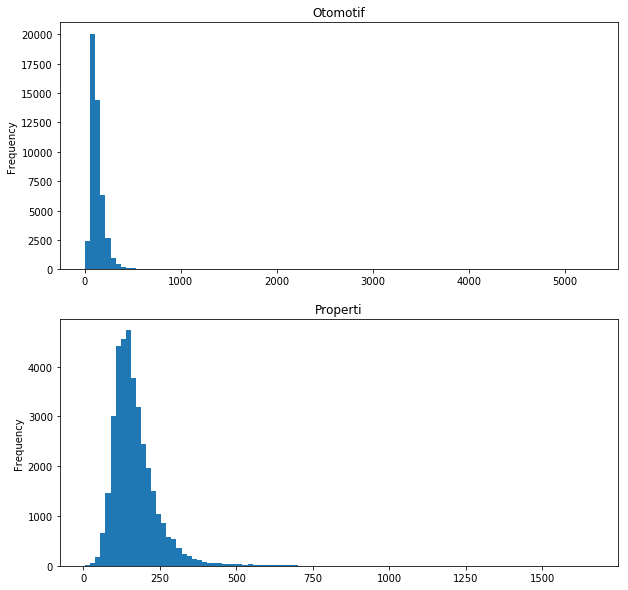

In [194]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(10,10)

# plt.figure(figsize=(10,5))
train_oto['word_count_after_prep2'].plot.hist(bins=100, title='Otomotif', ax=ax1)
train_prop['word_count_after_prep2'].plot.hist(bins=100, title='Properti', ax=ax2)

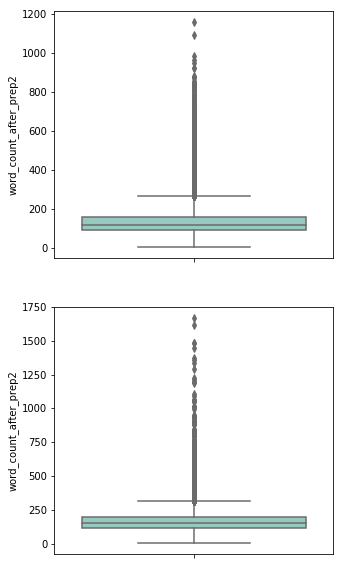

In [202]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(5,10)

# plt.figure(figsize=(5,10))
sns.boxplot(data=train_oto[['word_count_after_prep2']],y="word_count_after_prep2",orient="v",palette="Set3", ax=ax1)
sns.boxplot(data=train_prop[['word_count_after_prep2']],y="word_count_after_prep2",orient="v",palette="Set3", ax=ax2)

# axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")

In [213]:
# train_oto = train_oto[train_oto['id'] != 119970]
# train_oto = train_oto[train_oto['id'] != 164912]

In [211]:
# a = train_prop[train_prop["word_count_after_prep2"] > 1500]
# a

In [212]:
# c = data[data['id'] == 158041]
# print(c['url'].iloc[0])

### Visualisasi

In [219]:
# oto = train_oto.groupby(['author']).count()[['id']].sort_values(by='id', ascending=False).reset_index().iloc[:5]
# oto

In [215]:
oto_time = train_oto.groupby('class_time')[['id']].count().sort_values(by='id', ascending=False).reset_index()
oto_time['percen'] = round((100*oto_time['id']/sum(oto_time['id'])),2)
oto_time

class_time     id  percen
0   sore hari  20309   42.52
1   pagi hari  14895   31.18
2  malam hari  10206   21.37
3   dini hari   2357    4.93

In [221]:
prop_time = train_prop.groupby('class_time')[['id']].count().sort_values(by='id', ascending=False).reset_index()
prop_time['percen'] = round((100*prop_time['id']/sum(prop_time['id'])),2)
prop_time

class_time     id  percen
0   pagi hari  14295   38.99
1   sore hari  11918   32.51
2  malam hari   7014   19.13
3   dini hari   3433    9.36

In [252]:
# dayAggregated = pd.DataFrame(train.groupby(["class_time","clean_category"],sort=True)["id"].count()).reset_index()
# dayAggregated

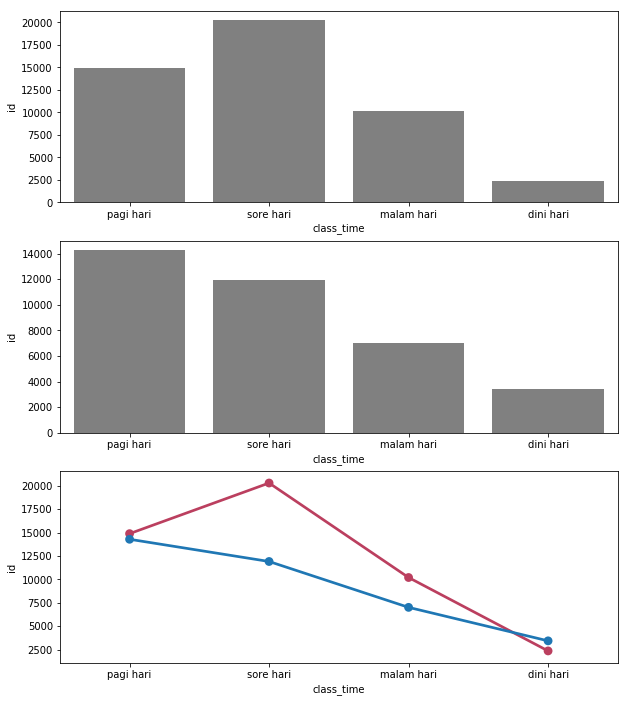

In [254]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=3)
fig.set_size_inches(10,12)

timeOrder = ["pagi hari","sore hari","malam hari","dini hari"]
sns.barplot(data=oto_time,x="class_time",y="id", order=timeOrder, ax=ax1, color='grey')
sns.barplot(data=prop_time,x="class_time",y="id", order=timeOrder, ax=ax2, color='grey')
sns.pointplot(data=oto_time,x="class_time",y="id", order=timeOrder, ax=ax3, color='#bb3f5f')
sns.pointplot(data=prop_time,x="class_time",y="id", order=timeOrder, ax=ax3)


# dayAggregated = pd.DataFrame(train.groupby(["class_time","clean_category"],sort=True)["id"].count()).reset_index()
# sns.pointplot(x=dayAggregated["class_time"], y=dayAggregated["id"],hue=dayAggregated["clean_category"],hue_order=dayOrder, data=dayAggregated, join=True,ax=ax3)
# ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')


In [271]:
train_oto.head(1)

id        author source_x   subcategory  \
0  147  Fadhliansyah  gridoto  Tips & Trick   

                                            content2             pubdate  \
0   atur tinggi sinar lampu motor riding malam si... 2018-08-08 22:07:00   

  clean_category source_y  word_count  avg_word  word_count_after_prep  \
0       otomotif  gridoto         125     6.424                     79   

   avg_word_after_prep      time        date  \
0             5.025641  22:07:00  2018-08-08   

                                           tokenized  \
0  [atur, tinggi, sinar, lampu, motor, riding, ma...   

                                      tokenized_word  word_count_after_prep2  \
0  [atur, tinggi, sinar, lampu, motor, riding, ma...                      77   

         day  class_time  
0  wednesday  malam hari

In [274]:
oto_day = train_oto.groupby('day')[['id']].count().sort_values(by='id', ascending=False).reset_index()
oto_day['percen'] = round((100*oto_day['id']/sum(oto_day['id'])),2)
oto_day

day    id  percen
0   thursday  7823   16.38
1    tuesday  7809   16.35
2  wednesday  7697   16.11
3     monday  7411   15.51
4     friday  7283   15.25
5   saturday  5091   10.66
6     sunday  4653    9.74

In [277]:
prop_day = train_prop.groupby('day')[['id']].count().sort_values(by='id', ascending=False).reset_index()
prop_day['percen'] = round((100*prop_day['id']/sum(prop_day['id'])),2)
prop_day

day    id  percen
0     monday  9490   25.89
1    tuesday  6874   18.75
2  wednesday  5663   15.45
3     friday  5117   13.96
4   thursday  5113   13.95
5   saturday  2582    7.04
6     sunday  1821    4.97

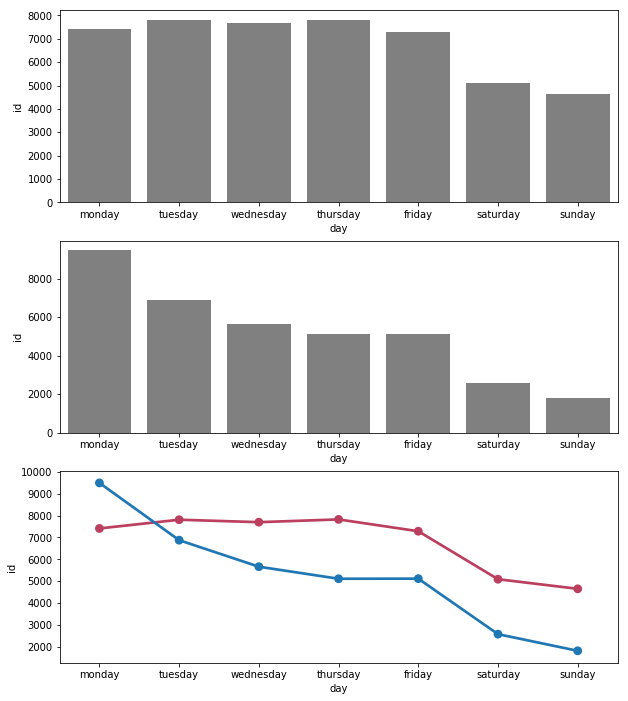

In [284]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=3)
fig.set_size_inches(10,12)

dayOrder = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
sns.barplot(data=oto_day,x="day",y="id", order=dayOrder, ax=ax1, color='grey')
sns.barplot(data=prop_day,x="day",y="id", order=dayOrder, ax=ax2, color='grey')
sns.pointplot(data=oto_day,x="day",y="id", order=dayOrder, ax=ax3, color='#bb3f5f')
sns.pointplot(data=prop_day,x="day",y="id", order=dayOrder, ax=ax3)

In [388]:
train_oto.groupby('source_x').count()[['id']].sort_values(by='id', ascending=False).reset_index().iloc[:10]

source_x     id
0     gridoto  24801
1       detik   5721
2   otodriver   2080
3    Liputan6   1702
4    mobil123   1621
5         oto   1514
6    otorider   1499
7      otosia   1419
8     carmudi   1402
9  cintamobil   1364

In [389]:
train_prop.groupby('source_x').count()[['id']].sort_values(by='id', ascending=False).reset_index().iloc[:10]

source_x    id
0    metrotvnews  7852
1      Sindonews  5457
2        rumahku  5271
3        okezone  4350
4       Liputan6  4285
5          tempo  3007
6          detik  2196
7       rumah123  1364
8       tirto.id  1166
9  housingestate   760

In [380]:
author_oto = train_oto.groupby(['author','source_x']).count()[['id']].sort_values(by='id', ascending=False).reset_index().iloc[:5]
author_oto

author source_x    id
0            Radityo K  gridoto  1168
1  Rangga Rahadiansyah    detik  1090
2         Dida Argadea  gridoto  1058
3         Dina Rayanti    detik  1017
4       Ruly Kurniawan    detik   996

In [382]:
author_prop = train_prop.groupby(['author','source_x']).count()[['id']].sort_values(by='id', ascending=False).reset_index().iloc[:6]
author_prop

author     source_x    id
0                       metrotvnews  1787
1       Rina Anggraeni    Sindonews  1053
2   Annisa ayu artanti  metrotvnews   888
3    Angga Bratadharma  metrotvnews   804
4      Eko Nordiansyah  metrotvnews   803
5   Dian Ihsan Siregar  metrotvnews   712

In [375]:
train_oto.head()

id                author   source_x   subcategory  \
0  147          Fadhliansyah    gridoto  Tips & Trick   
1  148      Aditya Widiutomo  otodriver        berita   
2  149     Danu P Dirgantoro  otodriver        berita   
3  150  Ditta Aditya Pratama    gridoto     Peristiwa   
4  151     Danu P Dirgantoro  otodriver        berita   

                                            content2             pubdate  \
0   atur tinggi sinar lampu motor riding malam si... 2018-08-08 22:07:00   
1  lumas deltalube hadir kali ajang giias 2018 de... 2018-08-09 19:00:00   
2  mazda tampil agam produk giias 2018 serta prog... 2018-08-09 16:00:00   
3   kendara mogok lintas lintas kereta api bilang... 2018-08-08 21:55:34   
4  agam merek oli lomba lomba pamer produk unggul... 2018-08-09 15:00:00   

  clean_category   source_y  word_count  avg_word  word_count_after_prep  \
0       otomotif    gridoto         125  6.424000                     79   
1       otomotif  otodriver         138  6.297101                    108   
2       otomotif  otodriver         221  6.113122                    138   
3       otomotif    gridoto         257  6.307393                    163   
4       otomotif  otodriver         279  5.577061                    194   

   avg_word_after_prep      time        date  \
0             5.025641  22:07:00  2018-08-08   
1             5.268519  19:00:00  2018-08-09   
2             4.898551  16:00:00  2018-08-09   
3             5.253086  21:55:34  2018-08-08   
4             4.747423  15:00:00  2018-08-09   

                                           tokenized  \
0  [atur, tinggi, sinar, lampu, motor, riding, ma...   
1  [lumas, deltalube, hadir, kali, ajang, giias, ...   
2  [mazda, tampil, agam, produk, giias, 2018, ser...   
3  [kendara, mogok, lintas, lintas, kereta, api, ...   
4  [agam, merek, oli, lomba, lomba, pamer, produk...   

                                      tokenized_word  word_count_after_prep2  \
0  [atur, tinggi, sinar, lampu, motor, riding, ma...                      77   
1  [lumas, deltalube, hadir, kali, ajang, giias, ...                      90   
2  [mazda, tampil, agam, produk, giias, serta, pr...                     124   
3  [kendara, mogok, lintas, lintas, kereta, api, ...                     149   
4  [agam, merek, oli, lomba, lomba, pamer, produk...                     175   

         day  class_time  
0  wednesday  malam hari  
1   thursday  malam hari  
2   thursday   sore hari  
3  wednesday  malam hari  
4   thursday   sore hari

In [322]:
# import pandas as pd  
# import spacy
# import numpy as np
# import scattertext as st

# import nltk
# from nltk import word_tokenize
# from nltk.util import ngrams
# from collections import Counter

# #add a type column and a assign it an arbitary value.
# train_oto['type'] = ''
# #Use some conditional logic to populate this new field:
# train_oto['type'] = np.where(df.roast == 'Light', 'Light',  np.where(df.roast == 'Very Dark', 'Dark',np.where(df.roast == 'Dark', 'Dark','')))
# #you can check if this has worked using df.type.value_counts()

# df1 = train_oto.iloc[:5]
# df1 = df1['tokenized_word'].apply(lambda x: ' '.join(x))
# all_data = ' '.join(list(df1))

# corpus = nltk.word_tokenize(all_data)

# freq = nltk.FreqDist(corpus)